## Logistic Regression - Predicting Images
*Source: YouTube Simplilearn Tutorials https://www.youtube.com/watch?v=XnOAdxOWXWg&list=PLEiEAq2VkUULYYgj13YHUWmRePqiu8Ddy&index=15*

### What is Logistic Regression

Logistic regression is a classification algorithm. It is used to predict a binary outcome based on a set of independent variables.

Ok, so what does this mean? A binary outcome is one where there are only two possible scenarios—either the event happens (1) or it does not happen (0). Independent variables are those variables or factors which may influence the outcome (or dependent variable).

So: Logistic regression is the correct type of analysis to use when you’re working with binary data. You know you’re dealing with binary data when the output or dependent variable is dichotomous or categorical in nature; in other words, if it fits into one of two categories (such as “yes” or “no”, “pass” or “fail”, and so on).  

**Before we begin you should read the FULL article:** https://careerfoundry.com/en/blog/data-analytics/what-is-logistic-regression/

In [1]:
#importing libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [2]:
digits.data.shape

(1797, 64)

In [3]:
digits.target.shape

(1797,)

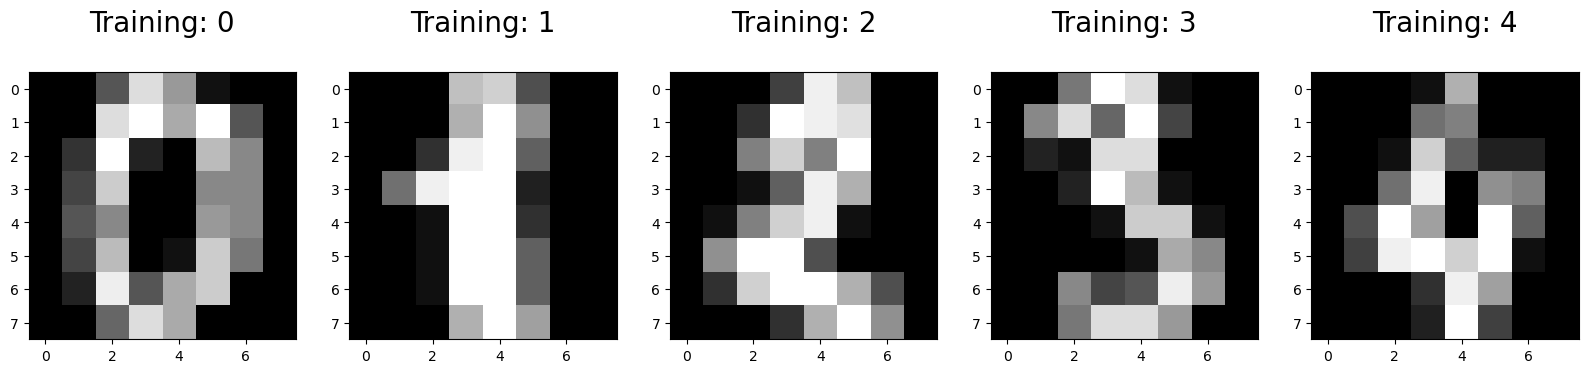

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)

### Extracting Independent and Dependent Variables

In [5]:
#Assign everything except the profit column to X (capital letter)
X = digits.data
#Assign the profit column to y (lower case letter)
y = digits.target

#Display X
X
#Display y
y

array([0, 1, 2, ..., 8, 9, 8])

### Splitting the Dataset into Train and Test

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.23,random_state=2)

In [7]:
print(X_train.shape)

(1383, 64)


In [8]:
print(y_train.shape)

(1383,)


In [9]:
print(X_test.shape)

(414, 64)


In [10]:
print(y_test.shape)

(414,)


### Fitting the Dataset into Train and Test

In [11]:
#https://forecastegy.com/posts/how-to-solve-logistic-regression-not-converging-in-scikit-learn/
#If you get a warning when you run this code - read the content in the link to see if you can solve it 

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=1700, solver='sag') #1696 fixes the interations, its the max 
logisticRegr.fit(X_train,y_train)

LogisticRegression(max_iter=1700, solver='sag')

### Predicting the Test Dataset

In [12]:
logisticRegr.predict(X_test[0].reshape(1, -1))

array([4])

In [13]:
logisticRegr.predict(X_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [14]:
predictions = logisticRegr.predict(X_test)
predictions

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 8, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 8, 5, 7,
       9, 8, 9, 6, 1, 7, 0, 1, 9, 7, 3, 3, 1, 8, 8, 8, 9, 8, 5, 8, 4, 9,
       3, 5, 8, 4, 3, 9, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4,
       6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 1, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9,
       4, 7, 0, 3, 5, 8, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 5, 1,
       0, 3, 4, 3, 0, 8, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8,
       2, 1, 8, 4, 1, 3, 1, 1, 9, 5, 4, 8, 7, 4, 8, 9, 5, 7, 6, 9, 4, 0,
       4, 0, 0, 9, 0, 6, 5, 8, 8, 3, 7, 9, 2, 0, 3, 2, 7, 3, 0, 2, 1, 5,
       2, 7, 0, 6, 9, 3, 3, 1, 3, 5, 2, 8, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5,
       9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2,
       8, 7, 3, 7, 8, 0, 3, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2,
       5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 9, 5, 5, 5, 4, 0, 1, 8, 6,
       2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9,

In [15]:
#what the first 10 results actually are
y_test[:10]

array([4, 0, 9, 1, 4, 7, 1, 5, 1, 6])

In [16]:
#what the first 10 predictions are
predictions[:10]

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

### Evaluating the Model

In [17]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9516908212560387


In [18]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  3,  1],
       [ 0,  1,  0,  0,  1, 44,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  1, 30]], dtype=int64)

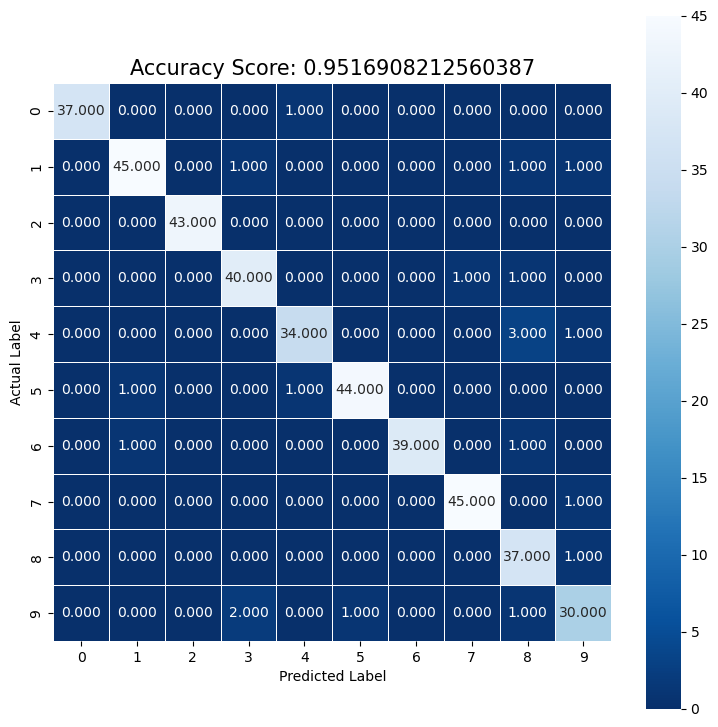

In [19]:
plt.figure(figsize=(9,9))

sns.heatmap(cm, annot=True, fmt=".3f", linewidth=.5, square = True, cmap='Blues_r')

#Show the plot
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)

plt.show()

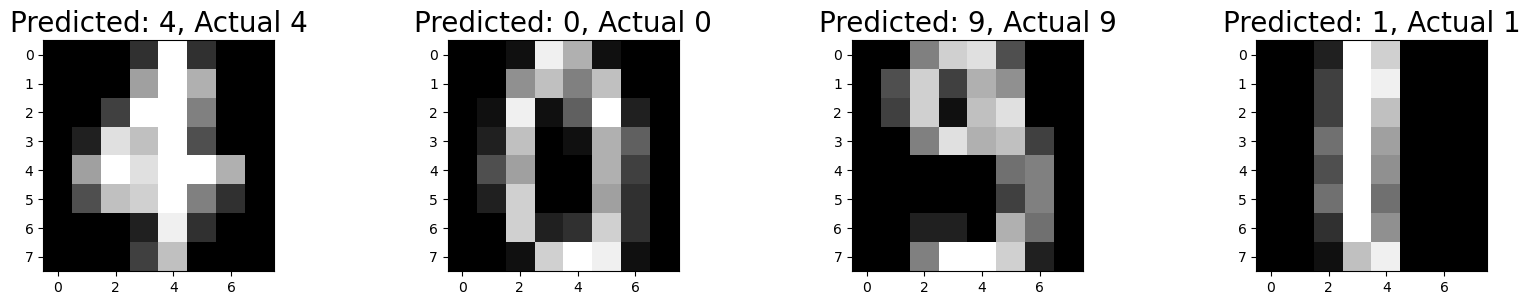

In [20]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict==actual:
        misclassifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex +1)
    plt.imshow(np.reshape(X_test[wrong], (8, 8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual {}'.format(predictions[wrong], y_test[wrong]), fontsize=20)